In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing and Organizing the data

In model development all the steps carried out in EDA for data cleaning will be same, however we will take 1,2,3,4,5 years and these are merged together.

In [2]:
dataset_1 = arff.loadarff('/content/1year.arff')
dataset_2 = arff.loadarff('/content/2year.arff')
dataset_3 = arff.loadarff('/content/3year.arff')
dataset_4 = arff.loadarff('/content/4year.arff')
dataset_5 = arff.loadarff('/content/5year.arff')

In [3]:
#Training dataset
df1 = pd.DataFrame(dataset_1[0])
df2 = pd.DataFrame(dataset_2[0])
df3 = pd.DataFrame(dataset_3[0])
df5 = pd.DataFrame(dataset_5[0])
df4 = pd.DataFrame(dataset_4[0])

In [4]:
df = pd.concat([df1,df2,df3,df4,df5],axis = 0)

In [5]:
print("{0} Rows and {1} columns for dataset".format(df.shape[0],df.shape[1]))

43405 Rows and 65 columns for dataset


In [6]:
#Top five records in the data
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [7]:
df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
5905,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'
5909,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,b'1'


In [8]:
#Checking the Datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22 

In [9]:
df.corr()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
Attr1,1.000000,-0.104146,0.058037,0.000855,0.002742,0.315139,0.408428,0.000184,-0.225720,-0.240254,...,0.004014,0.000044,0.007764,-0.000302,-0.000220,0.000213,0.000582,0.000325,0.008387,-0.069029
Attr2,-0.104146,1.000000,-0.926983,-0.001589,-0.036344,-0.842916,0.102020,-0.002385,-0.016594,-0.409341,...,-0.009580,-0.000235,-0.000793,0.000270,0.000617,-0.000078,-0.001191,0.046871,-0.003339,-0.015649
Attr3,0.058037,-0.926983,1.000000,0.002335,0.038900,0.760215,0.033521,0.001267,-0.002981,0.369558,...,0.011101,0.000017,0.000779,-0.000034,-0.000247,0.000377,-0.000139,-0.050162,0.004044,-0.000909
Attr4,0.000855,-0.001589,0.002335,1.000000,0.001852,0.000050,0.000167,0.598635,-0.000392,0.001668,...,-0.000078,0.000281,0.000125,-0.000289,-0.000266,0.001671,0.004387,-0.000704,0.039447,0.000122
Attr5,0.002742,-0.036344,0.038900,0.001852,1.000000,0.029307,0.001491,0.001631,0.000796,0.014709,...,0.001535,-0.000031,-0.000009,0.000029,0.000067,0.000087,0.000007,-0.002639,0.000690,0.000198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Attr60,0.000213,-0.000078,0.000377,0.001671,0.000087,-0.000070,0.054043,0.000114,0.076701,-0.000206,...,-0.001078,0.000070,-0.000685,-0.000070,0.000569,1.000000,0.033671,-0.000098,0.101587,0.014150
Attr61,0.000582,-0.001191,-0.000139,0.004387,0.000007,0.000319,0.084975,0.003879,0.115765,0.021728,...,-0.001837,0.000153,0.000360,-0.000169,-0.000218,0.033671,1.000000,-0.000315,0.109143,0.147088
Attr62,0.000325,0.046871,-0.050162,-0.000704,-0.002639,-0.039735,0.000059,-0.000260,-0.000435,-0.018828,...,-0.002787,-0.864130,-0.000012,0.863849,0.000030,-0.000098,-0.000315,1.000000,-0.000793,-0.000272
Attr63,0.008387,-0.003339,0.004044,0.039447,0.000690,0.000825,0.709315,0.038943,0.933967,0.004136,...,0.000290,0.000372,0.001252,-0.000411,-0.000594,0.101587,0.109143,-0.000793,1.000000,0.277732


In [10]:
df.shape

(43405, 65)

In [11]:
df.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class      object
Length: 65, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' contains 'class' column
label_encoder = LabelEncoder()

# Convert class labels to integers
df['class'] = label_encoder.fit_transform(df['class'])

In [13]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [14]:
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


We can see that the CLASS feature is of Object-Type which means it is probably in String format. We will first check the unique values in that series then replace them with either 0 or 1

In [15]:
#Listing the names of all features
data_keys=list(df.columns)
len(data_keys)

65

In [16]:
#Checking the unique values in the Class-Feature
df['class'].unique()

array([0, 1])

In [17]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

<Figure size 2200x300 with 0 Axes>

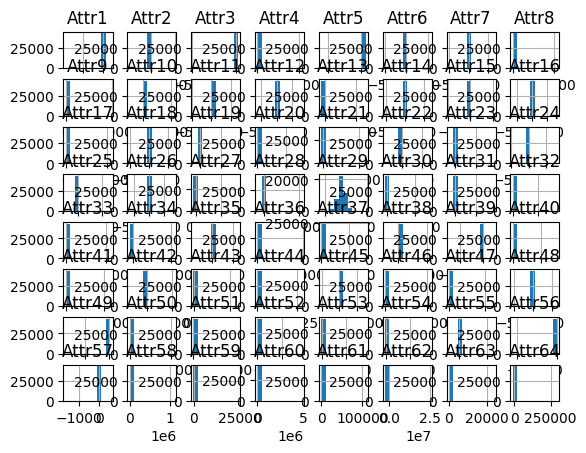

In [18]:
# Assuming 'df' is your DataFrame
freqgraph = df.select_dtypes(include=['float'])

# Set the size of the plots
plt.figure(figsize=(22, 3))

# Create histograms for the selected columns
freqgraph.hist()

# Display the plots
plt.show()


In [19]:
df['class'].dtype #The datatype for the CLASS-Feature is now converted into INT type.

dtype('int64')

In [20]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

<Axes: title={'center': 'Distribution of Class Labels in Data'}>

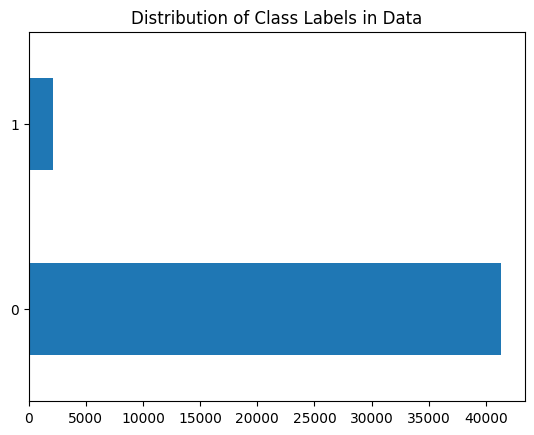

In [21]:
plt.title('Distribution of Class Labels in Data')
df['class'].value_counts().plot(kind = 'barh')

Missing Values Solving

In [22]:
df.isna().sum()

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64

In [23]:
total_cells= np.product(df.shape)
total_missing=df.isnull().sum().sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing,'percent')

1.4646309801245867 percent


Text(0.5, 1.0, 'Missing values in Dataset')

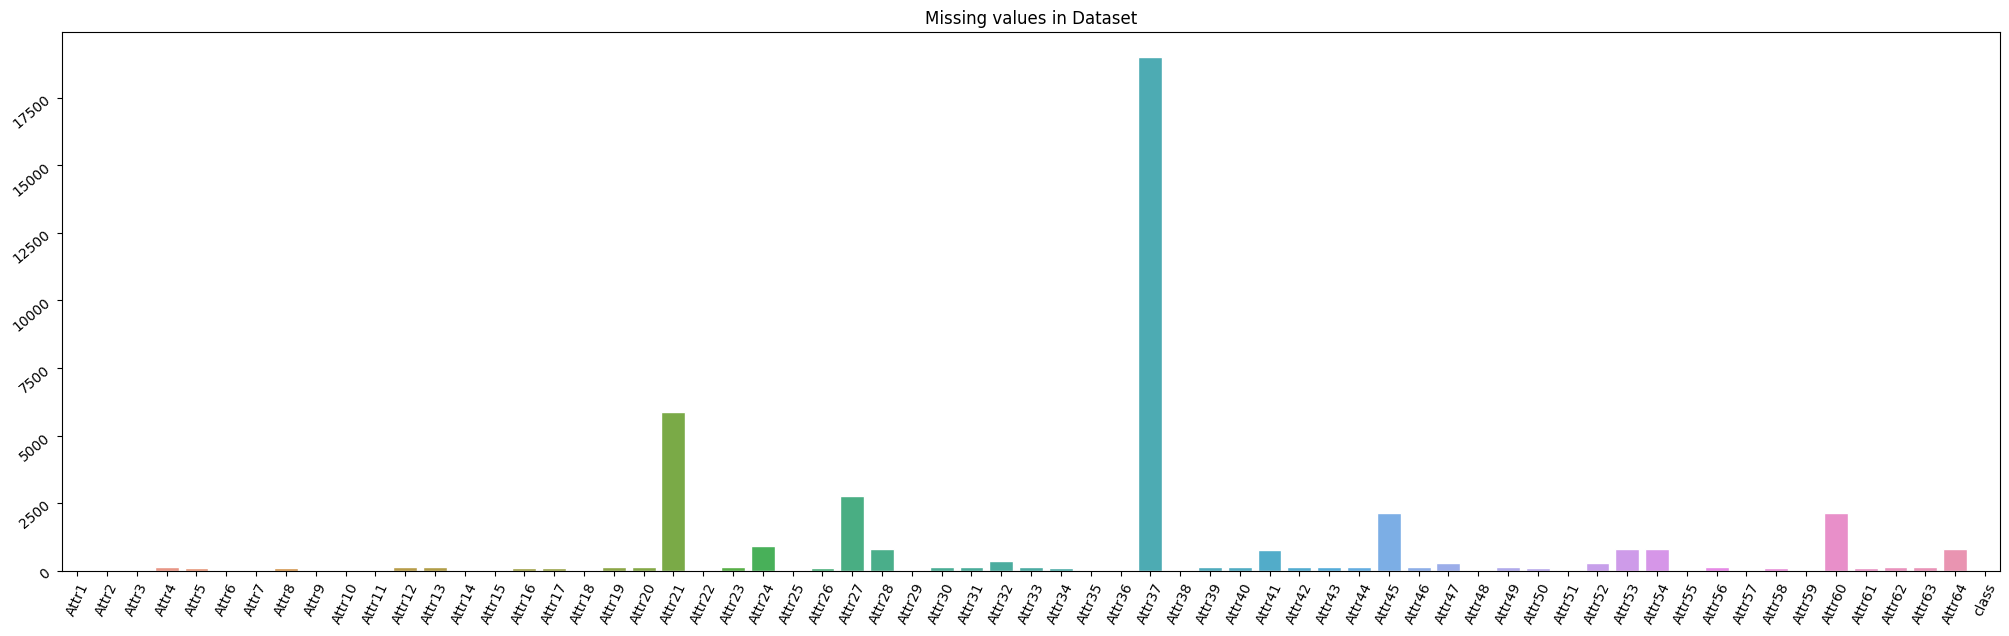

In [24]:
plt.figure(figsize = (25,7))
plt.xticks(rotation=65)
plt.yticks(rotation=40)
sns.set_theme(style = "ticks", palette = "pastel")
sns.barplot(x = df.columns,y = df.isna().sum().values)
plt.title("Missing values in Dataset")

<Figure size 5000x6000 with 0 Axes>

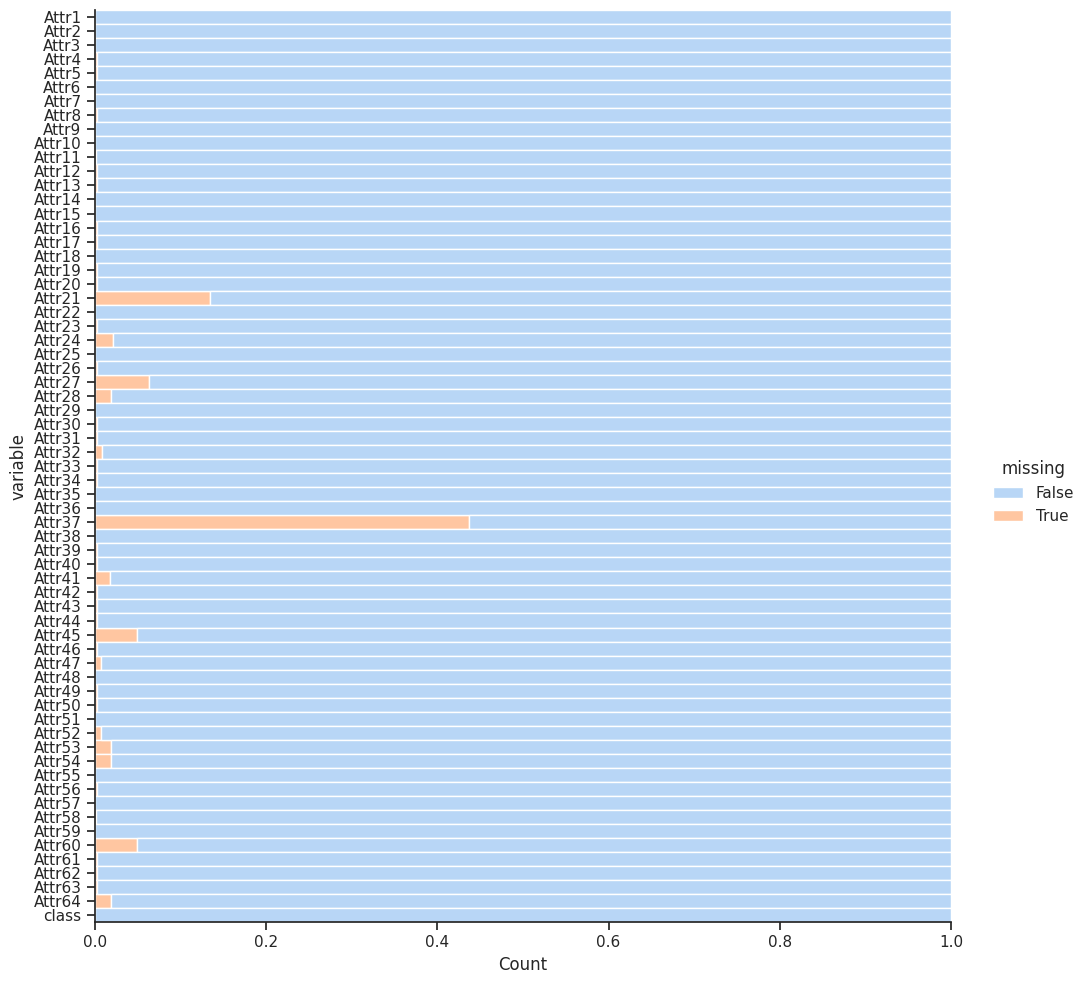

In [25]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)

Text(0.5, 1.0, 'Missing values in Dataset')

<Figure size 5000x6000 with 0 Axes>

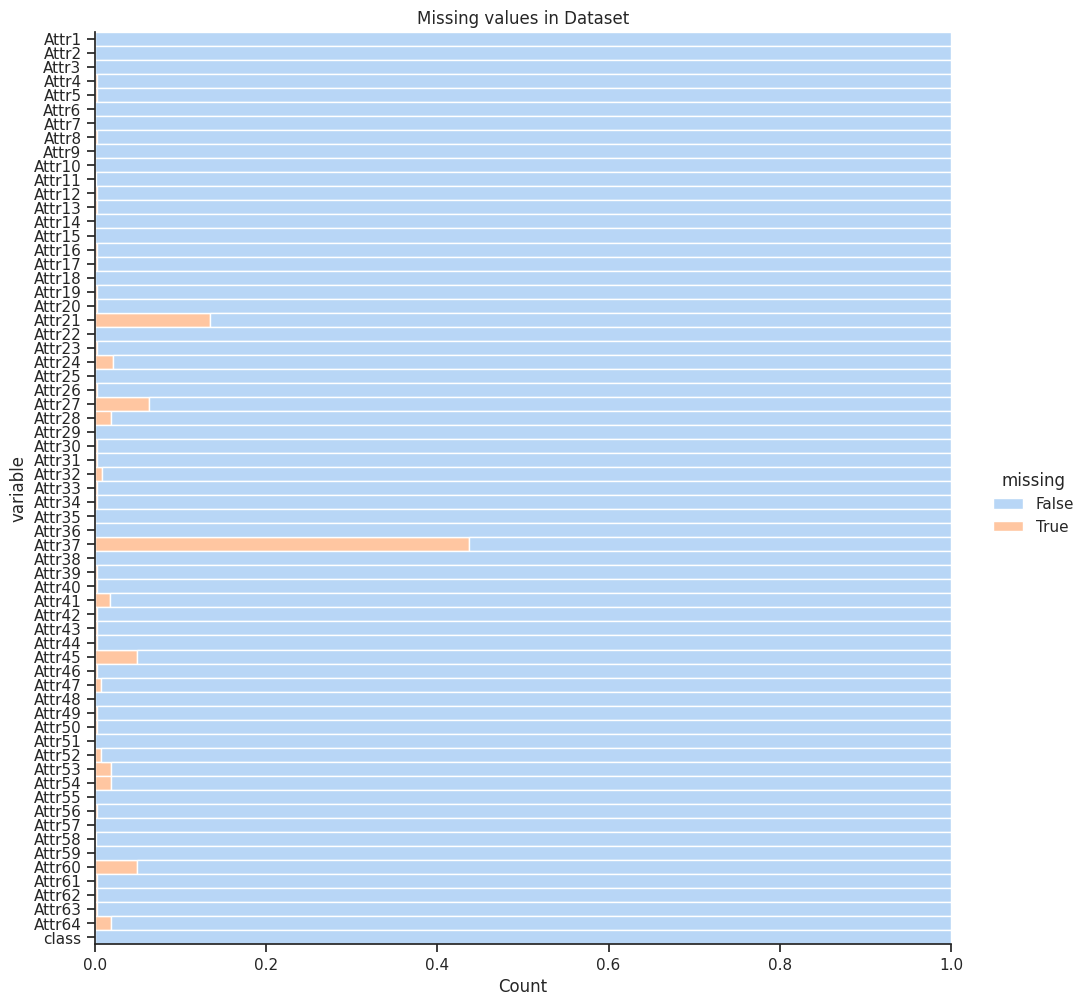

In [26]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)
plt.title("Missing values in Dataset")

As we can see there are plethora of missing values in our dataset. We can use bfill, ffill, mean, mode or median for filling the missing values using fillna() method.

Text(0.5, 1.0, 'Missing data distribution')

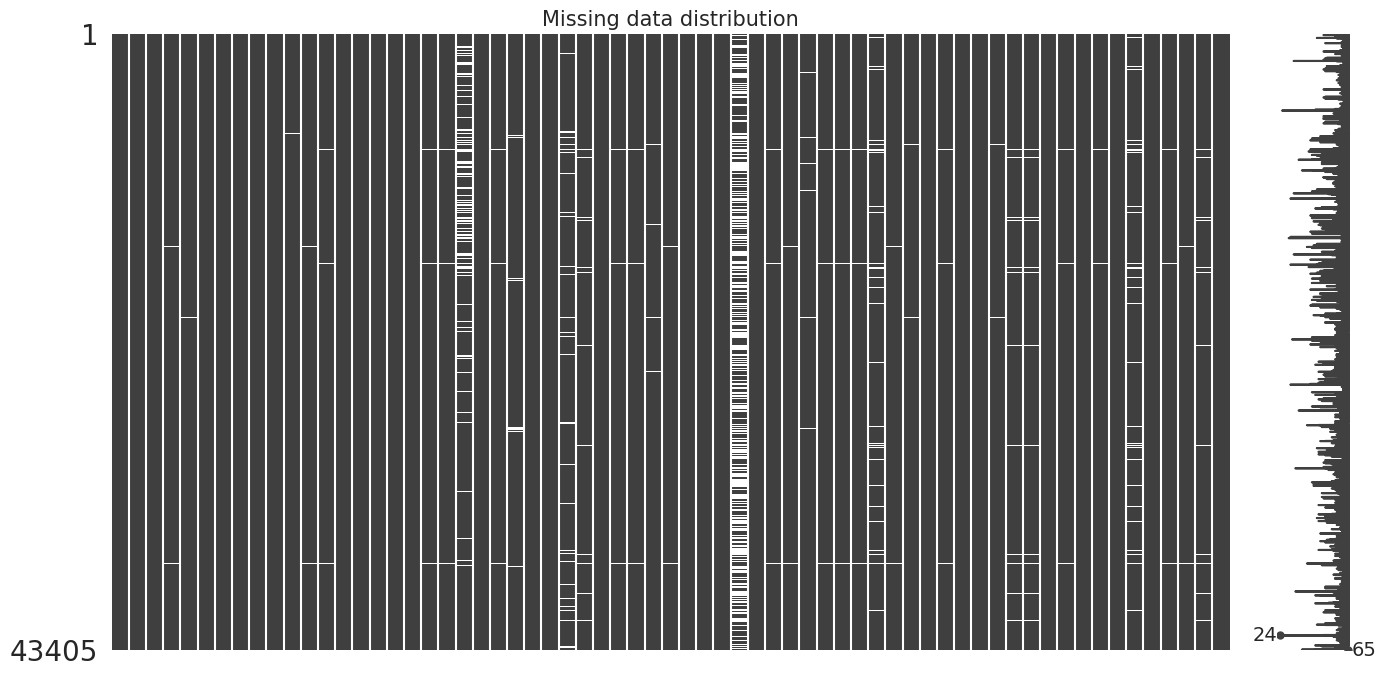

In [27]:
msno.matrix(df, figsize=(16,8))
plt.title("Missing data distribution", size=15)

<Axes: >

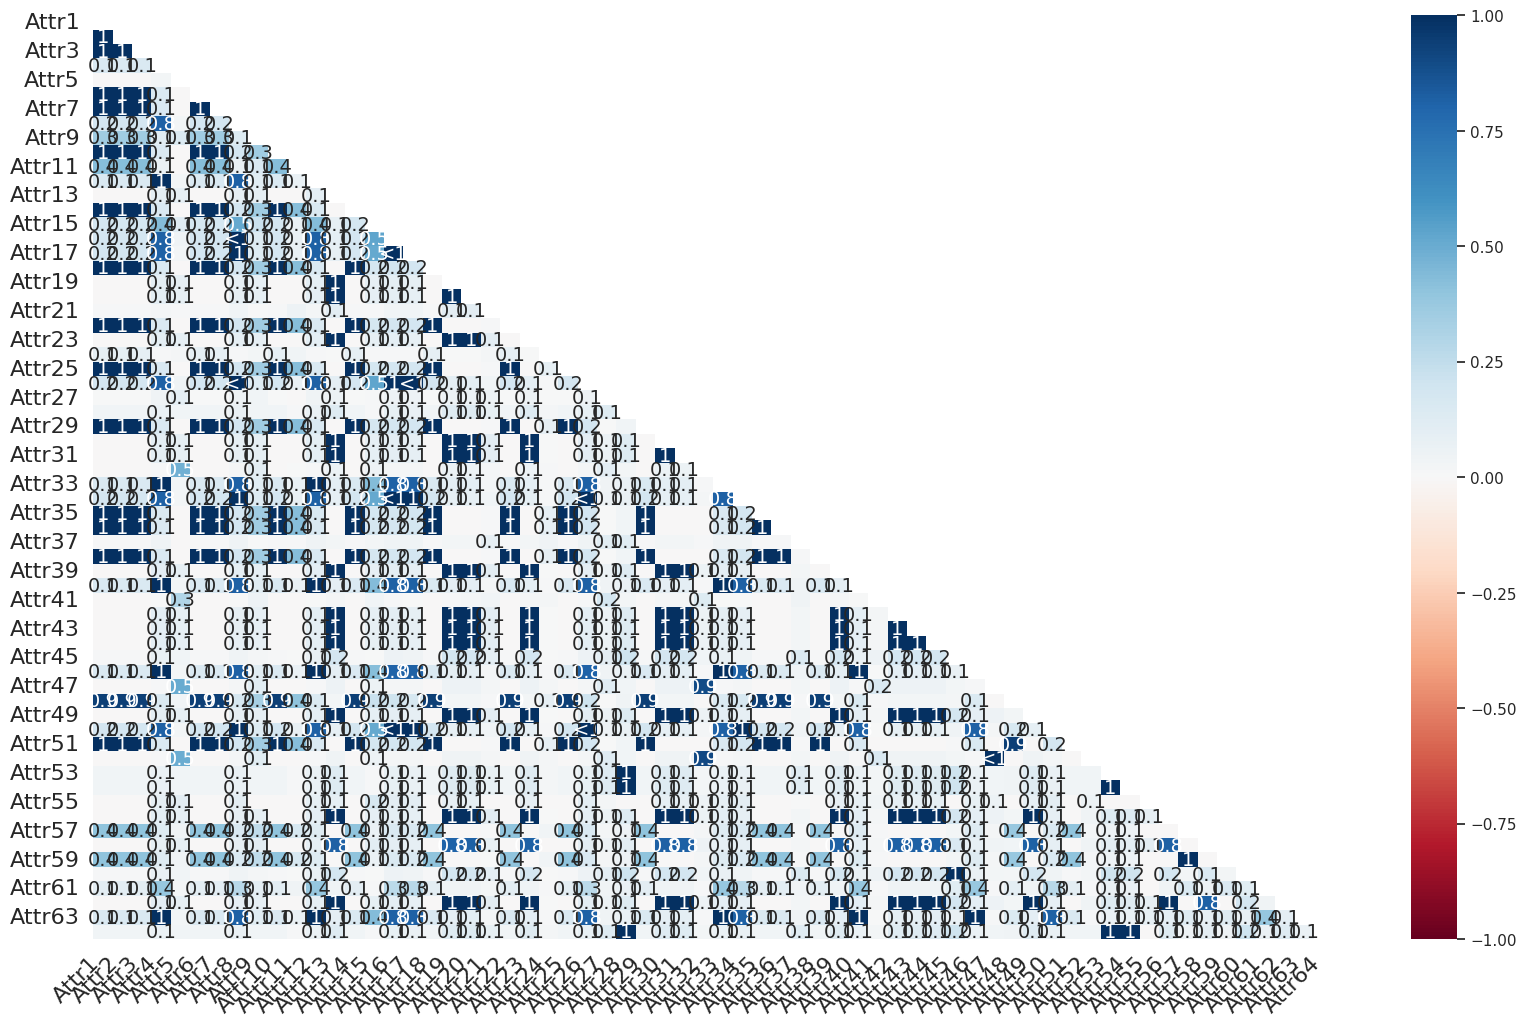

In [28]:
msno.heatmap(df)

In [29]:
df.isna().sum()

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64

In [30]:
# Assuming 'df_train' is your DataFrame containing the columns 'Attr1' to 'Attr64'

for i in range(1, 65):  # Assuming the columns are named from 'Attr1' to 'Attr64'
    col_name = f'Attr{i}'
    df[col_name] = df[col_name].fillna(df[col_name].mode().iloc[0])

In [31]:
df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [32]:
column_names = [
'net profit / total assets',
'total liabilities / total assets',
'working capital / total assets',
'current assets / short-term liabilities',
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365',
'retained earnings / total assets',
'EBIT / total assets',
'book value of equity / total liabilities',
'sales / total assets',
'equity / total assets',
'(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities',
'(gross profit + depreciation) / sales',
'(gross profit + interest) / total assets',
'(total liabilities 365) / (gross profit + depreciation)',
'(gross profit + depreciation) / total liabilities',
'total assets / total liabilities',
'gross profit / total assets',
'gross profit / sales',
'(inventory 365) / sales',
'sales (n) / sales (n-1)',
'profit on operating activities / total assets',
'net profit / sales',
'gross profit (in 3 years) / total assets',
'(equity - share capital) / total assets',
'(net profit + depreciation) / total liabilities',
'profit on operating activities / financial expenses',
'working capital / fixed assets',
'logarithm of total assets',
'(total liabilities - cash) / sales',
'(gross profit + interest) / sales',
'(current liabilities 365) / cost of products sold',
'operating expenses / short-term liabilities',
'operating expenses / total liabilities',
'profit on sales / total assets',
'total sales / total assets',
'(current assets - inventories) / long-term liabilities',
'constant capital / total assets',
'profit on sales / sales',
'(current assets - inventory - receivables) / short-term liabilities',
'total liabilities / ((profit on operating activities + depreciation) (12/365))',
'profit on operating activities / sales',
'rotation receivables + inventory turnover in days',
'(receivables 365) / sales',
'net profit / inventory',
'(current assets - inventory) / short-term liabilities',
'(inventory 365) / cost of products sold',
'EBITDA (profit on operating activities - depreciation) / total assets',
'EBITDA (profit on operating activities - depreciation) / sales',
'current assets / total liabilities',
'short-term liabilities / total assets',
'(short-term liabilities 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'working capital',
'(sales - cost of products sold) / sales',
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
'total costs /total sales',
'long-term liabilities / equity',
'sales / inventory',
'sales / receivables',
'(short-term liabilities *365) / sales',
'sales / short-term liabilities',
'sales / fixed assets',
'class'
]

df.columns = column_names

In [33]:
df

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


Data Imputation

In [34]:
def meanImpute(feature):
    avg = df[feature].mean()
    return avg

In [35]:
for feature in df.columns:
    impute_avg = meanImpute(feature)
    df[feature].fillna(impute_avg,inplace = True)

In [36]:
print('Missing values in data',df.isna().any().sum()) ##There are no Missing values

Missing values in data 0


Mean Imputation

In [37]:
def meanImpute(feature):
    avg = df[feature].mean()
    return avg

# Assuming 'df' is your DataFrame
for feature in df.columns:
    impute_avg = meanImpute(feature)
    df[feature].fillna(impute_avg, inplace=True)

In [38]:
print('Missing values in data',df.isna().any().sum()) ##There are no Missing values

Missing values in data 0


As you can see we dealt with missing values and there are no missing values in our dataset now. We will move forward and check whether our dataset is balanced or not

Dealing with Imabalance Data

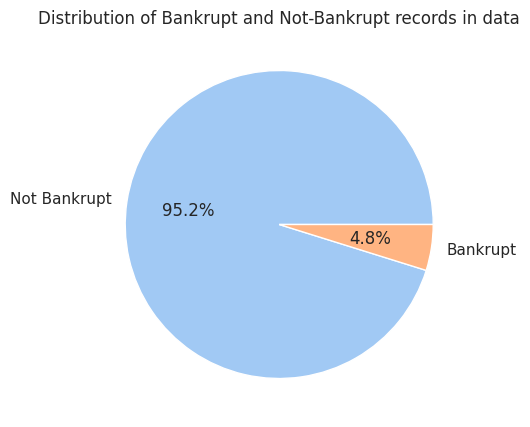

In [39]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df['class'].value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in data")
plt.show()


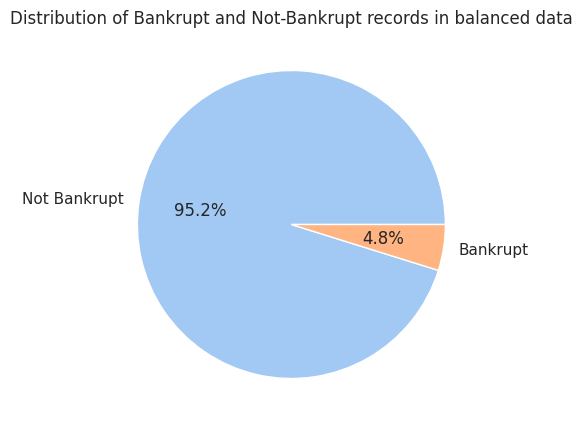

In [40]:
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt

# Assuming 'balanced_df' is your balanced DataFrame
plt.figure(figsize=(7, 5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df['class'].value_counts().values, labels=labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in balanced data")
plt.show()

It can be clearly seen from the pie chart that the dataset is imbalanced. So we will now apply SMOTE for oversampling of data values.

In [41]:
X = df.drop(columns = 'class')
y = df[['class']]

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
oversample = SMOTE()

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert class labels to numeric
y_numeric = label_encoder.fit_transform(y)

In [46]:
# Convert class labels to numeric using replace
y_numeric = y.replace({'Not Bankrupt': 0, 'Bankrupt': 1})


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Convert class labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=0)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [49]:
X_train, y_train = oversample.fit_resample(X_train,y_train)

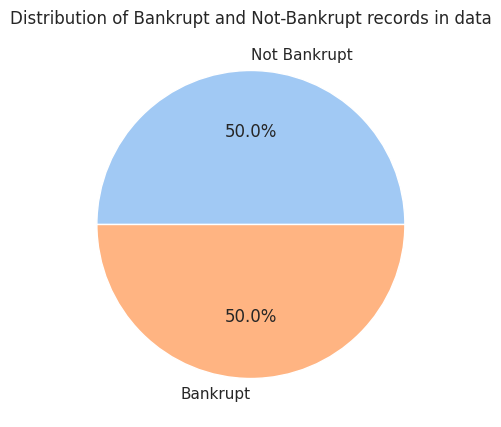

In [50]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]

plt.pie(pd.DataFrame(y_train).value_counts(),labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in data")
plt.show()
plt.show()

In [51]:
df.dtypes

net profit / total assets                                                                                            float64
total liabilities / total assets                                                                                     float64
working capital / total assets                                                                                       float64
current assets / short-term liabilities                                                                              float64
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365    float64
                                                                                                                      ...   
sales / receivables                                                                                                  float64
(short-term liabilities *365) / sales                                                                                float64


In [52]:
df

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


The dataset is balanced now at the ratio of 50: 50

FEATURE ENGINEERING STEPS

Feature engineering involves creating new features or modifying existing ones to improve the performance of your machine learning model. Given that your dataset contains financial ratios, you might want to consider creating additional relevant features

Train Test Split

In [53]:
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Functions for each feature selection method

Method 1: PCA

In [55]:
from sklearn.decomposition import PCA
def apply_pca(X_train, X_test, num_components):
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

Method 2: Mutual Information Analysis

In [56]:
def apply_mutual_information(X_train, X_test, num_features):
    mi_scores = mutual_info_regression(X_train, y_train)
    selected_features_indices = mi_scores.argsort()[::-1][:num_features]
    X_train_mi = X_train[:, selected_features_indices]
    X_test_mi = X_test[:, selected_features_indices]
    return X_train_mi, X_test_mi

Method 3: Pearson Correlation Coefficient

In [57]:
def apply_pearson_correlation(X_train, X_test, correlation_threshold):
    correlation_matrix = pd.DataFrame(X_train).corr()
    highly_correlated_pairs = {}
    for col in correlation_matrix.columns:
        correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
        correlated_cols.remove(col)
        highly_correlated_pairs[col] = correlated_cols
    columns_to_retain = set(range(X_train.shape[1]))
    for _, correlated_cols in highly_correlated_pairs.items():
        columns_to_retain.difference_update(correlated_cols)
    selected_features = list(columns_to_retain)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    return X_train_selected, X_test_selected

Defining model

In [58]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
# Methods and parameters
methods = {
    'PCA': (apply_pca, {'num_components': 35}),
    'Mutual Information': (apply_mutual_information, {'num_features': 35}),
    'Pearson Correlation': (apply_pearson_correlation, {'correlation_threshold': 0.6}),
}

In [60]:
from sklearn.metrics import mean_squared_error
# Applying methods
for method, (apply_method, params) in methods.items():
    X_train_method, X_test_method = apply_method(X_train_scaled, X_test_scaled, **params)
    model.fit(X_train_method, y_train)
    y_pred = model.predict(X_test_method)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{method} Mean Squared Error (MSE): {mse}")

PCA Mean Squared Error (MSE): 0.04833700895284764
Mutual Information Mean Squared Error (MSE): 0.04842441954783179
Pearson Correlation Mean Squared Error (MSE): 0.048423328963608646


Creating a dataset w.r.t Principal Component Analysis

In [61]:
def apply_pca(X_train, X_test, num_components):
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# Applying PCA with a specified number of components
num_components = 35
X_train_pca, X_test_pca = apply_pca(X_train, X_test, num_components)

# Creainge new dataframes with PCA components
pca_column_names = [f'PC{i+1}' for i in range(num_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_column_names)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_column_names)

In [62]:
X_train_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,-1744.606585,-7976.348365,992.338760,183.845163,-674.977195,-1135.363265,-277.888587,-92.862352,-198.712725,-69.228655,...,0.164920,-2.923523,0.982263,-1.203506,-0.193662,-0.806228,-0.349880,-0.500777,-0.125331,-0.439141
1,-1770.939627,-1299.771407,-9087.966158,-344.573954,-683.612579,-1136.953922,-303.188957,-94.978263,-196.422966,-60.130507,...,0.298623,-3.316784,2.333541,-1.431859,-0.254811,-0.991418,2.285784,-0.471661,0.122261,0.080230
2,-1687.223172,-5598.280725,-7912.980042,-42.951714,-628.457603,-1137.963113,-310.695774,-125.317870,-165.485639,-48.993446,...,0.810661,-4.580981,1.732866,-1.484645,-0.419755,-1.416384,2.475955,-0.516539,0.104269,0.139992
3,-1701.706998,-1590.126247,-7260.254978,-322.014580,-653.902820,-1135.458977,-299.559435,-91.783799,-200.734630,-62.483492,...,0.139570,-2.356284,1.480926,-1.430432,-0.276259,-0.862149,0.626244,-0.759684,0.006606,0.022304
4,-1816.771612,-833.927580,-11635.218350,-345.270876,-699.168938,-1137.588105,-283.973151,-72.817627,-203.785184,-71.595104,...,-0.136141,-1.562523,1.003578,-1.474089,-0.435397,-0.583864,-0.176044,0.485637,-0.031375,-0.038169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34719,-1698.021953,-299.456618,40241.551865,-135.060261,-524.162495,-1111.233254,-121.172659,-34.177519,-200.302867,-67.839960,...,-0.986800,1.829013,0.687109,2.637248,-0.540272,0.030583,0.985875,-0.261656,-0.067709,0.122912
34720,-1901.387714,-2547.652936,-7777.570303,-339.391250,-878.173259,80829.157092,253.139966,-65.520304,-190.587705,40.693136,...,0.497847,-3.601959,-28.565801,2.873362,3.353980,-0.820818,-1.354904,-0.161092,-1.747794,1.702469
34721,-1848.910542,-2188.537898,-4776.507910,-306.059215,-759.591809,-1132.314391,-317.412329,-85.585947,-190.434129,-70.151943,...,0.949324,-3.892307,-1.109810,-1.801761,-0.373599,-1.404584,-6.236321,-0.059743,-0.063946,1.870947
34722,-1791.154328,404.883763,-9981.793565,-462.790768,-704.292227,-1136.533070,-293.843208,-81.197943,-202.039979,-71.111764,...,-0.000031,-2.262482,1.060655,-1.445733,-0.434708,-0.725444,-0.249720,0.066238,-0.019213,-0.156725


Creating dataset w.r.t Pearson correlation matrix

In [63]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                                    net profit / total assets  \
net profit / total assets                                            1.000000   
total liabilities / total assets                                    -0.104146   
working capital / total assets                                       0.058037   
current assets / short-term liabilities                              0.000359   
[(cash + short-term securities + receivables - ...                   0.002736   
...                                                                       ...   
sales / receivables                                                  0.000387   
(short-term liabilities *365) / sales                                0.000325   
sales / short-term liabilities                                       0.002867   
sales / fixed assets                                                -0.067116   
class                                                               -0.026643   

                           

In [64]:
correlation_threshold = 0.6
highly_correlated_pairs = {}

for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    correlated_cols.remove(col)
    highly_correlated_pairs[col] = correlated_cols

columns_to_retain = set(df.columns)

for col, correlated_cols in highly_correlated_pairs.items():
    columns_to_retain.difference_update(correlated_cols)

selected_columns = list(columns_to_retain)
df_pearson_corr = df[selected_columns]

In [65]:
df_pearson_corr

,total liabilities / ((profit on operating activities + depreciation) (12/365)),(short-term liabilities 365) / cost of products sold),class,sales (n) / sales (n-1),logarithm of total assets,profit on sales / sales,profit on operating activities / financial expenses,net profit / inventory,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),(total liabilities 365) / (gross profit + depreciation),(current assets - inventory - receivables) / short-term liabilities,(current assets - inventories) / long-term liabilities,working capital,sales / inventory,working capital / fixed assets,net profit / total assets,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,sales / receivables,long-term liabilities / equity
0,0.051402,0.25792,0,1.24790,5.9443,0.128040,1.45820,1.00970,0.397180,497.42,0.662950,593.27000,348690.00,8.4160,1.761500,0.200550,32.3510,5.1372,0.001924
1,0.064371,0.33472,0,1.42930,3.6884,0.121300,88.44400,0.51045,0.420020,677.96,0.086422,0.00000,2304.60,4.1486,16.946000,0.209120,14.7860,3.2732,0.000000
2,0.074020,0.48474,0,1.42830,4.3749,0.241140,86.01100,0.94807,0.817740,794.16,0.322020,2.30190,6332.70,4.9909,1.062700,0.248660,-1.1523,3.9510,0.694840
3,0.069622,0.25033,0,1.50690,4.6511,0.088995,0.94076,0.28720,0.142070,917.01,0.401390,0.00000,20545.00,4.5746,1.961800,0.081483,51.9520,3.6147,0.000000
4,0.096680,0.40285,0,1.00000,4.1424,0.122310,1.41380,0.73919,0.484310,1133.20,0.293040,11.24700,3186.60,6.3985,1.118400,0.187320,-7.3128,4.3158,0.124440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.356510,0.13514,1,1.03300,4.9667,0.020169,1.46370,0.10363,0.043904,6507.60,0.022858,0.37850,3599.10,13.4720,0.052831,0.012898,-18.9070,12.4320,1.259400
5906,-0.073529,0.20912,1,0.64770,4.0622,-0.123990,0.00000,-14.83600,1.482000,-742.28,0.024771,17.03600,-9242.10,110.7200,-0.952400,-0.578050,-67.3650,44.7590,-0.018084
5907,0.214140,0.66913,1,0.83104,5.3244,0.092780,0.00000,-0.92630,0.548240,-3298.20,0.064095,3.60650,-58253.00,9.8526,-1.442300,-0.179050,-120.4400,3.4892,-0.522430
5908,-0.589300,0.19247,1,1.12100,4.8555,-0.129340,0.00000,-1.95610,-1.167700,-5352.10,0.048976,0.23908,1107.50,13.8860,0.019106,-0.108860,-17.0030,6.0769,6.092400


In [66]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'],axis=1)
y=df['class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming you've already loaded and concatenated the data into 'df'

# Split the data into features (X) and target (y)
X = df.drop(['class'], axis=1)
y = df['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# K-Nearest Neighbors (KNN) classification
knn = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate KNN accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print KNN evaluation metrics
print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", classification_rep_knn)

KNN Accuracy: 0.9528856122566525
KNN Confusion Matrix:
 [[8267   29]
 [ 380    5]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8296
           1       0.15      0.01      0.02       385

    accuracy                           0.95      8681
   macro avg       0.55      0.50      0.50      8681
weighted avg       0.92      0.95      0.93      8681



In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("KNN Accuracy:", accuracy)
print("KNN Confusion Matrix:\n", conf_matrix)
print("KNN Classification Report:\n", classification_rep)

KNN Accuracy: 0.9528856122566525
KNN Confusion Matrix:
 [[8267   29]
 [ 380    5]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8296
           1       0.15      0.01      0.02       385

    accuracy                           0.95      8681
   macro avg       0.55      0.50      0.50      8681
weighted avg       0.92      0.95      0.93      8681

